In [21]:
import pandas as pd

df = pd.read_csv('input/housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [22]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [23]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [24]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [25]:
from sklearn.model_selection import train_test_split

#30% of overall dataset assigned to validation and test
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#50% split between validation and test data
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size = 0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [26]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
  Dense(32, activation = 'relu', input_shape = (10,)),
  Dense(32, activation = 'relu'),
  Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
hist = model.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_data = (X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 16ms/step - loss: 0.6772 - accuracy: 0.5359 - val_loss: 0.6719 - val_accuracy: 0.5662
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5509 - val_loss: 0.6639 - val_accuracy: 0.6301
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.6238 - val_loss: 0.6564 - val_accuracy: 0.6895
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.6690 - val_loss: 0.6494 - val_accuracy: 0.7032
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.7121 - val_loss: 0.6428 - val_accuracy: 0.7306
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.7070 - val_loss: 0.6364 - val_accuracy: 0.7352
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.7319 - val_loss: 0.6301 - val_accuracy: 0.7489
Epoch 8/100


In [28]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2667 - accuracy: 0.8813


0.8812785148620605

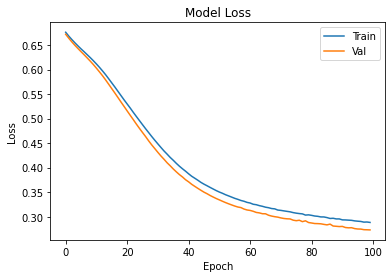

In [29]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

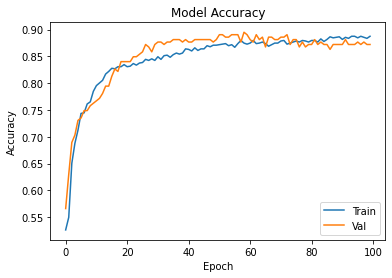

In [31]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [32]:
#Over Fitting Model

model_2 = Sequential([
  Dense(1000, activation = 'relu', input_shape = (10,)),
  Dense(1000, activation = 'relu'),
  Dense(1000, activation = 'relu'),
  Dense(1000, activation = 'relu'),
  Dense(1, activation = 'sigmoid'),
])

model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
hist = model_2.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_data = (X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 53ms/step - loss: 0.5522 - accuracy: 0.6955 - val_loss: 0.4026 - val_accuracy: 0.7991
Epoch 2/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4071 - accuracy: 0.8244 - val_loss: 0.3479 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2912 - accuracy: 0.8950 - val_loss: 0.3213 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2890 - accuracy: 0.8906 - val_loss: 0.2868 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2787 - accuracy: 0.8855 - val_loss: 0.2843 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3290 - accuracy: 0.8709 - val_loss: 0.2901 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2562 - accuracy: 0.8996 - val_loss: 0.3488 - val_accuracy: 0.8676
Epoch 

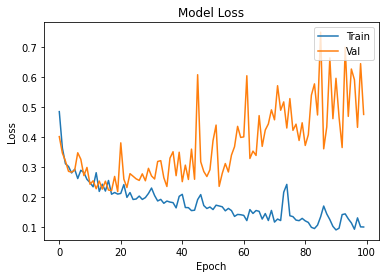

In [34]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

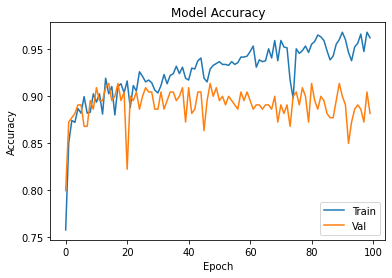

In [35]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [41]:
#Model 3 with L2 Regularization and Dropout
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [42]:
hist_3 = model_3.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_val, Y_val))

Epoch 1/10
32/32 [==============================] - 4s 66ms/step - loss: 21.1085 - accuracy: 0.5798 - val_loss: 3.8803 - val_accuracy: 0.7123
Epoch 2/10
32/32 [==============================] - 2s 51ms/step - loss: 2.5062 - accuracy: 0.8057 - val_loss: 0.7151 - val_accuracy: 0.8082
Epoch 3/10
32/32 [==============================] - 2s 51ms/step - loss: 0.6174 - accuracy: 0.8583 - val_loss: 0.4937 - val_accuracy: 0.8721
Epoch 4/10
32/32 [==============================] - 2s 53ms/step - loss: 0.5107 - accuracy: 0.8754 - val_loss: 0.4782 - val_accuracy: 0.8721
Epoch 5/10
32/32 [==============================] - 2s 51ms/step - loss: 0.4832 - accuracy: 0.8724 - val_loss: 0.5196 - val_accuracy: 0.8630
Epoch 6/10
32/32 [==============================] - 2s 51ms/step - loss: 0.4902 - accuracy: 0.8858 - val_loss: 0.5185 - val_accuracy: 0.8493
Epoch 7/10
32/32 [==============================] - 2s 52ms/step - loss: 0.4812 - accuracy: 0.8804 - val_loss: 0.4626 - val_accuracy: 0.8858
Epoch 8/10
3

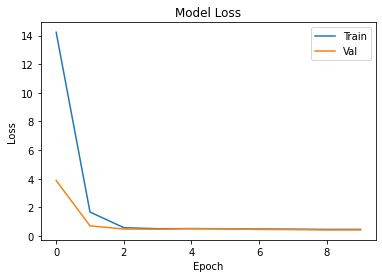

In [43]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

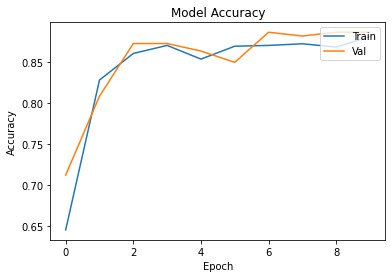

In [44]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()